### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
df=pd.read_csv("data/drugLibTrain_raw.tsv",sep='\t')
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [4]:
df.keys()

Index(['rating', 'effectiveness', 'sideEffects'], dtype='object')

In [16]:
df["commentsReview"].unique()

array(['monitor blood pressure , weight and asses for resolution of fluid',
       'I Hate This Birth Control, I Would Not Suggest This To Anyone.',
       'I took 2 pills at the onset of my menstrual cramps and then every 8-12 hours took 1 pill as needed for about 3-4 days until cramps were over. If cramps are bad, make sure to take every 8 hours on the dot because the medication stops working suddenly and unfortunately takes about an hour to an hour and a half to kick back in.. if cramps are only moderate, taking every 12 hours is okay.',
       ..., '---',
       'Started at 2 doses of 300 mg a day and worked up to 4 doses per day over a six month period. Only at 1200 mg a day did the drug control the seizures. During each time when I increased the dosage, I founf the side-effects worsened, but after a week or so, the side effects minimized and then disappeared.',
       'I take Micardis in pill form once daily.'], dtype=object)

In [2]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("urlDrugName",axis=1,inplace=True)
df.drop("condition",axis=1,inplace=True)
df.drop("benefitsReview",axis=1,inplace=True)
df.drop("sideEffectsReview",axis=1,inplace=True)
df.drop("commentsReview",axis=1,inplace=True)
df

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


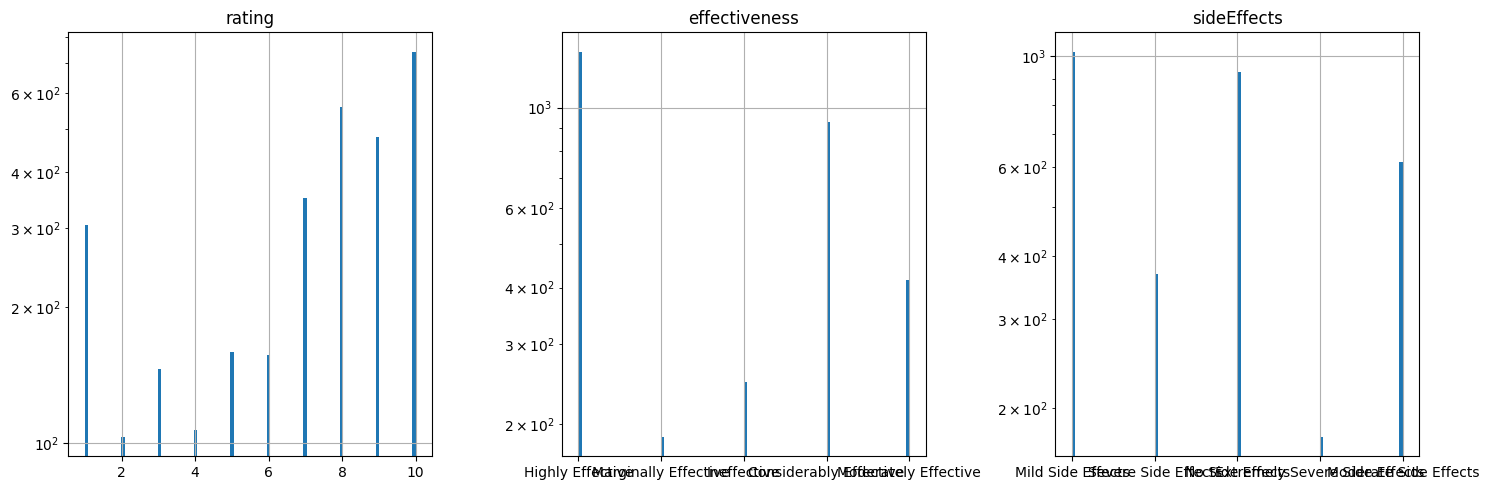

In [6]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df[c].hist(ax=ax, bins=100)

figure.tight_layout() #this feature separate the graphs correctly
plt.show;

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [10]:
X = df[["rating","effectiveness","sideEffects"]]
df2 = pd.get_dummies(X)
df2['rating'] = df2['rating'].astype('int')
df2

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,10,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,0,1,0,0,0,0,1,0,0,0
3103,1,0,0,1,0,0,1,0,0,0,0
3104,2,0,0,0,1,0,0,0,1,0,0
3105,8,1,0,0,0,0,0,1,0,0,0


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
Nc = range(1, 21)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]
score

[-31296.468619246818,
 -9743.174036708044,
 -6257.991747379055,
 -4828.157746588951,
 -4234.342225561053,
 -3810.521265285779,
 -3453.90318212415,
 -3186.4554102992815,
 -3034.3237781902767,
 -2839.7515262600436,
 -2675.0491851483753,
 -2533.6360219972867,
 -2421.7650853809337,
 -2331.5366400108933,
 -2226.0147353990556,
 -2128.7696521286225,
 -2086.9888941711097,
 -1999.2218513448847,
 -1912.424385188995,
 -1837.8895756787842]

In [29]:
silhouette_scores = [(silhouette_score(df2, model.labels_), model)
                     for model in kmeans[1:]]
silhouette_scores

[(0.6055089618561077, KMeans(n_clusters=2)),
 (0.4381585450078779, KMeans(n_clusters=3)),
 (0.39705280988017827, KMeans(n_clusters=4)),
 (0.35632018427663514, KMeans(n_clusters=5)),
 (0.36624561391524596, KMeans(n_clusters=6)),
 (0.4071899392230456, KMeans(n_clusters=7)),
 (0.41173737687131257, KMeans()),
 (0.4143212158524328, KMeans(n_clusters=9)),
 (0.4384715743004658, KMeans(n_clusters=10)),
 (0.44777020143956026, KMeans(n_clusters=11)),
 (0.4256036994066331, KMeans(n_clusters=12)),
 (0.435696750784695, KMeans(n_clusters=13)),
 (0.4573890005015747, KMeans(n_clusters=14)),
 (0.48957898193033017, KMeans(n_clusters=15)),
 (0.48910701867042217, KMeans(n_clusters=16)),
 (0.4688511671125522, KMeans(n_clusters=17)),
 (0.5012434640762632, KMeans(n_clusters=18)),
 (0.5211966617930179, KMeans(n_clusters=19)),
 (0.5135559952269406, KMeans(n_clusters=20))]

ValueError: x and y must have same first dimension, but have shapes (8,) and (19, 2)

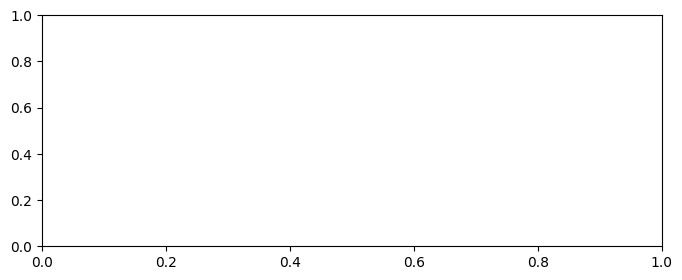

In [40]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

#### Genera el K Means 

In [32]:
kmeans=KMeans(4,random_state=0)
kmeans.fit(df2)

KMeans(n_clusters=4, random_state=0)

#### Muestra en un grafico de quesito la distribución de los distintos clusters

AttributeError: 'numpy.ndarray' object has no attribute 'unique'